In [1]:
import pandas as pd
import data.load_data as dat

In [2]:
## Importer les données
df_cdr = dat.load_csse_data()

In [3]:
for df in df_cdr:
    ## On va supposer que le Covid peut durer au delà de 2020, inch'allah non
    nbr_years = int(df.columns[-1].split('/')[2]) - 19
    ## On regarde pour combien de mois différents on a des données sur la dernière année
    nbr_months = int(df.columns[-1].split('/')[0])
        
    for y in range(nbr_years):
        year = 20 + y
        
        ## Si on a une année entière de données alors on passe sur tous les mois, sinon on s'arrête au dernier mois disponible pour l'année en cours
        if(year < 19 + nbr_years):
            max_month = 12
        else:
            max_month = nbr_months 
            
        for m in range(max_month):
            ## On filtre le DataFrame en ne gardant que les colonnes correspondant à l'année qui nous intéresse
            yearCols = df[[c for c in df if c.endswith(str(year))]]
            ## On récupère ensuite uniquement la dernière colonne disponible pour chaque mois, elle contient le nombre de cas confirmés au mois m
            valuesCol = df[[c for c in yearCols if c.startswith(str(m+1))]].columns[-1]
            df[str(m+1)+'/20'+str(year)] = df[valuesCol]

In [4]:
df_cdr[0]

,index,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,1/2020,2/2020,3/2020,4/2020,5/2020
0,35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,...,5573,5670,5766,5836,5893,0,0,690,5355,5893
1,36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,...,2145,2171,2171,2224,2232,1,8,1013,2112,2232
2,37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,...,13,13,13,13,13,0,0,13,13,13
3,38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,...,281,282,282,283,284,0,0,103,277,284
4,39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,...,118,118,118,118,119,0,0,70,118,119
5,40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,...,259,259,259,259,259,0,0,152,258,259
6,41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,...,959,963,971,985,991,0,0,147,947,991
7,42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,...,17880,18321,18574,19097,19468,3,11,1966,17395,19468
8,43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,...,27,27,27,27,27,0,0,21,27,27
9,44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,...,28656,29664,31873,32631,33425,0,1,4162,27550,33425


In [58]:
x_0['1/22/20']

0

<Figure size 864x504 with 0 Axes>

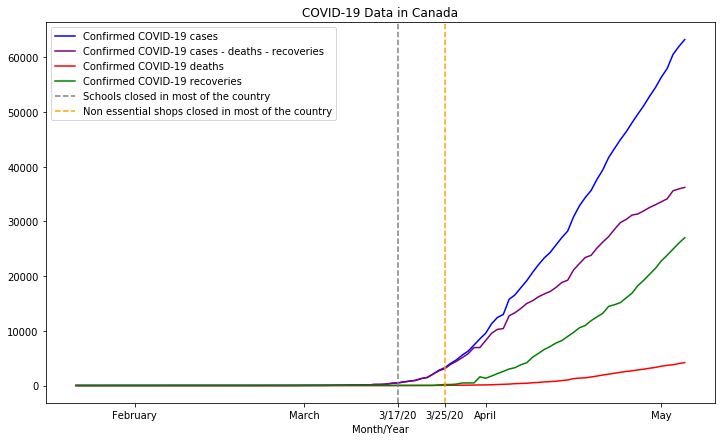

In [55]:
import matplotlib.pyplot as plt
import re

#### Perhaps not the most straightforward implementation but well.. it works
#### Probably easier by converting columns name from string to datetime

## Extract the values we'll use to plot
x_0 = df_cdr[0][[c for c in df_cdr[0] if re.search(r'/([0-9]|[0-9]{2})/[0-9]{2}$', c)]].sum()
x_1 = df_cdr[1][[c for c in df_cdr[1] if re.search(r'/([0-9]|[0-9]{2})/[0-9]{2}$', c)]].sum()
x_2 = df_cdr[2][[c for c in df_cdr[2] if re.search(r'/([0-9]|[0-9]{2})/[0-9]{2}$', c)]].sum()

## Extract the plots' y values
y_0 = x_0.values
y_1 = x_1.values
y_2 = x_2.values

## Extract the plots' x values
xvals = x_0.index
plt.figure(figsize=(12,7))
y_infected = y_0 - y_2

## Plots everything on the same graph
plt.plot(xvals, y_0, label="Confirmed COVID-19 cases", color='blue')
plt.plot(xvals, y_infected, label="Confirmed COVID-19 cases - deaths - recoveries", color='purple')
plt.plot(xvals, y_1, label="Confirmed COVID-19 deaths", color='red')
plt.plot(xvals, y_2, label="Confirmed COVID-19 recoveries", color='green')

## Add constant lines to show various breakpoints
plt.axvline(x='3/17/20', label='Schools closed in most of the country', color='gray', linestyle='dashed')
plt.axvline(x='3/25/20', label='Non essential shops closed in most of the country', color='orange', linestyle='dashed')

## Set custom ticks to avoid overloading the x axis
plt.xticks(ticks=['2/1/20', '3/1/20', '3/17/20', '3/25/20', '4/1/20', '5/1/20'], labels=['February', 'March', '3/17/20', '3/25/20', 'April', 'May'])
plt.title("COVID-19 Data in Canada")
plt.xlabel('Month/Year')
plt.legend(loc=2)

plt.show()

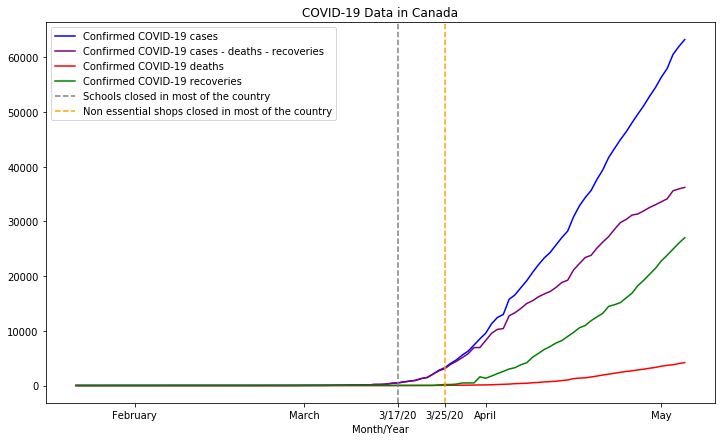

In [54]:
## Compute the number of new cases/day
for row in df

## Plots everything on the same graph
plt.plot(xvals, y_0, label="Confirmed COVID-19 cases", color='blue')
plt.plot(xvals, y_infected, label="Confirmed COVID-19 cases - deaths - recoveries", color='purple')
plt.plot(xvals, y_1, label="Confirmed COVID-19 deaths", color='red')
plt.plot(xvals, y_2, label="Confirmed COVID-19 recoveries", color='green')

## Add constant lines to show various breakpoints
plt.axvline(x='3/17/20', label='Schools closed in most of the country', color='gray', linestyle='dashed')
plt.axvline(x='3/25/20', label='Non essential shops closed in most of the country', color='orange', linestyle='dashed')

## Set custom ticks to avoid overloading the x axis
plt.xticks(ticks=['2/1/20', '3/1/20', '3/17/20', '3/25/20', '4/1/20', '5/1/20'], labels=['February', 'March', '3/17/20', '3/25/20', 'April', 'May'])
plt.title("COVID-19 Data in Canada")
plt.xlabel('Month/Year')
plt.legend(loc=2)

plt.show()